In [7]:

import pandas as pd

In [9]:

data = pd.read_csv("driver-data.csv", index_col="id")
data.head()

,mean_dist_day,mean_over_speed_perc
id,,
3423311935,71.24,28
3423313212,52.53,25
3423313724,64.54,27
3423311373,55.69,22
3423310999,54.58,25


In [10]:
from sklearn.cluster import KMeans

In [12]:

kmeans = KMeans(n_clusters=4)

In [13]:
kmeans.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [14]:
kmeans.cluster_centers_

array([[ 50.43591549,  32.39671362],
       [180.34311782,  10.52011494],
       [ 49.98800649,   5.20944484],
       [177.83509615,  70.28846154]])

In [15]:
kmeans.labels_

array([0, 0, 0, ..., 1, 1, 1])

In [16]:
import numpy as np

In [17]:
unique, counts = np.unique(kmeans.labels_, return_counts=True)

In [18]:
dict_data = dict(zip(unique, counts))
dict_data

{0: 426, 1: 696, 2: 2774, 3: 104}

In [19]:
import seaborn as sns

In [20]:
data["cluster"] = kmeans.labels_

F:\hbdhbds\lib\site-packages\seaborn\regression.py:574: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


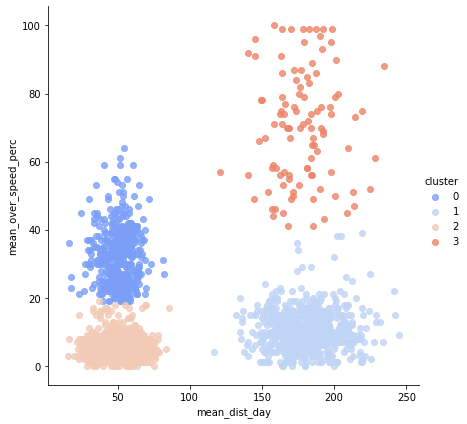

In [21]:
sns.lmplot('mean_dist_day', 'mean_over_speed_perc', data=data, hue='cluster', palette='coolwarm', size=6, aspect=1, fit_reg=False)

In [22]:

# Inertia is the sum of squared error for each cluster. 
# Therefore the smaller the inertia the denser the cluster(closer together all the points are)

kmeans.inertia_

719601.0859909916

In [23]:
kmeans.score

<bound method KMeans.score of KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)>

In [24]:
data

,mean_dist_day,mean_over_speed_perc,cluster
id,,,
3423311935,71.24,28,0
3423313212,52.53,25,0
3423313724,64.54,27,0
3423311373,55.69,22,0
3423310999,54.58,25,0
...,...,...,...
3423310685,160.04,10,1
3423312600,176.17,5,1
3423312921,170.91,12,1
